# **Applications of Principle Component Analysis (PCA)**

**First let's understand Clustering, Dimensional Reduction and Feature Engineering**

## Clustering, Dimensional Reduction and Feature Engineering

### Clustering
Clustering is an unsupervised machine learning technique that groups similar data points together based on patterns. 

Types of Clustering methods:
1. Partion-based Clustering (ex: K-Means) - Divides data into K clusters using centroid.
2. Density-based Clustering (e.g: DBSCAN, HDBSCAN) - Groups points based on density, identifying outliers.
3. Hierarchical clustering (e.g: Agglomerative, Divisive) - Forms a hierarchy of clusters, either bottom-up(agglomerative) ot top-down (Divisive).

Ex: Grouping customers based on shopping habits to personalize marketing.

## Dimensionality Reduction
Dimensionality reduction reduces the no of features in a dataset while preserving key information. 
This is useful for visualization, noise reduction, and improving model efficiency.

Populaar methods
1. principle componenet analysis (PCA) - Converts correlated features into uncorrelated principle components.
2. t-SNE (t-Distributed Stochastic Neighbor Embedding) - Captures local structures for 2D/3D visualization.
3. UMAP (Uniform Manifold Approximation and Projection) - Preserves both local and global structures, often used in high dimensional data sets like genomics and NLP.
4. Autoencoders(Deep learning) - Comparess and reconstruct data while keeping essential features.

Ex: Reducing thousands of pixel values in an image dataset to a few principal componenets to speed up processing.

## Feature Engineering
Feature engineering involves creating, transforming and selecting features to enhance model performance.

Key Techniques:
1. Feature selection: Removing irrelevant or redundant features (eg., using correlation analysis).
2. Feature Extraction: Creating new features (e.g., extracting 'weekend purchase' from a timestamp).
3. Feature transformation: Scaling numerical features (e.g., Min-Max Scaling, Standardization) and encoding categorical variables (One Hot Encoding, Label Encoding).

Ex: In a credit card fraud detection model, creating a feature like 'No of Transactions in the last hour' can improve predictions.

### Objectives of this Project

1. Use Principle Componenet Analysis (PCA) to project 2-D data onto its principal axes
2. Use PCA for feature space dimensionality reduction
3. Relate explained variance to feature importance and noise reduction

### Introduction
In this project we will explore how to implement two important applications of PCA.

1. The first application illustrates how you can use PCA to project 2-D data onto its principle axes, meaning the two orthgogonal directions that explain most of the variance in our data.
2. For the second application, we will use PCA to project higher dimensional data sown to lower dimensioanl feature space. This is an example of dimensional reduction, a powerful technique that has multiple benefits, including reducing our model building computational load and, in many cases, the accuracy of our model. PCA can help us filter out redundant, linearly correlated variables and reduce the amount of noise in our data.

### Part1: Using PCA to project 2-D data onto its principal axes.

Here, we will illustarte how we can use PCA to transform our 2-D data to represent it in terms of its principal axes - the projection of our data onto the orthogonal directions that explain most of the variance in our data. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

#### Create Dataset
Next we will create a 2 dimensional data set containing linearly correlated features.

We'll use bivariate normal distribution.

Both features, X1 and X2, will have zero mean and a covariance given by the (symmetric) covariance matrix:

\begin{equation}
\begin{pmatrix}
  3  & 2     \\\\\\\\
  2  & 2     \\
\end{pmatrix}
\end{equation}

Here, the diagonal; elements define the variance of X1 and X2 (3 and 2, respectively), while the off-diagonal dlement is the covatiance (2) between X1 and X2, which expresses how similarly these features vary.

In [2]:
np.random.seed(42)
mean = [0,0]
cov = [[3,2],[2,2]]
X = np.random.multivariate_normal(mean=mean, cov=cov, size = 200)

### Visualize the relationship between the two features.

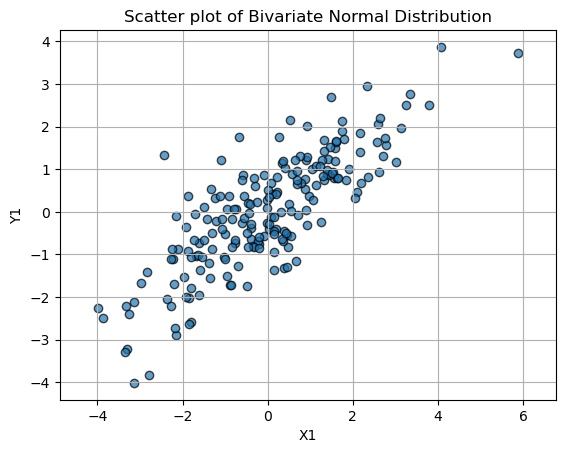

In [4]:
plt.figure()
plt.scatter(X[:,0], X[:,1], edgecolor = 'k', alpha = 0.7)
plt.title('Scatter plot of Bivariate Normal Distribution')
plt.xlabel('X1')
plt.ylabel('Y1')
plt.axis('equal')
plt.grid(True)
plt.show()

Consider the main direction the data follows in the scatterplot. It's actually the direction of the first principal component. You can use PCA to determine this direction.

##### Perform PCA on the dataset
Next, you'll initialize a 2-component PCA model with default parameters and then fit and transform the feature space in one step.

In [5]:
pca = PCA(n_components = 2)
X_pca = pca.fit_transform(X)

#### Get the principal components from the model.
The principal components are the principal axes, represented in feature space coordinates, which align with the directions of maximum variance in your data.

In [6]:
components = pca.components_
components

array([[ 0.78215821,  0.62307987],
       [-0.62307987,  0.78215821]])

The principal components are sorted in decreasing order by their explained variance, which can be expressed as a ratio:



In [7]:
pca.explained_variance_ratio_

array([0.9111946, 0.0888054])

### What percentage of the variance in the data is explained by the first principal component?

You can see that the first component explains over 90% of the variance in the data, while the second explains about 9%.

#### Display the results
Here, you'll use a scatterplot to display the data points in their original feature space, X1, X2.

You'll also plot the projections of the data points onto their principal component directions.

It's a bit technical, requiring some understanding of linear algebra, but the outcome will be instructive.

Let's see how this works.

#### Project the data onto its principal component axes
The projection of the data onto a given principal component yields the coordinates of each of the data points along that component's direction.

The new coordinates are given by the dot products of each point's coordinates with the given PCA component.

Specifically, the projections are given by:

In [8]:
projection_pc1 = np.dot(X, components[0])
projection_pc2 = np.dot(X, components[1])

Now that you have these coordinates, you can use them to represent the projections of each data point along the principal directions in the original feature space.

In [12]:
x_pc1 = projection_pc1 * components [0][0]
y_pc1 = projection_pc1 * components[0][1]
x_pc2 = projection_pc2 * components [1][0]
y_pc2 = projection_pc2 * components [1][1]

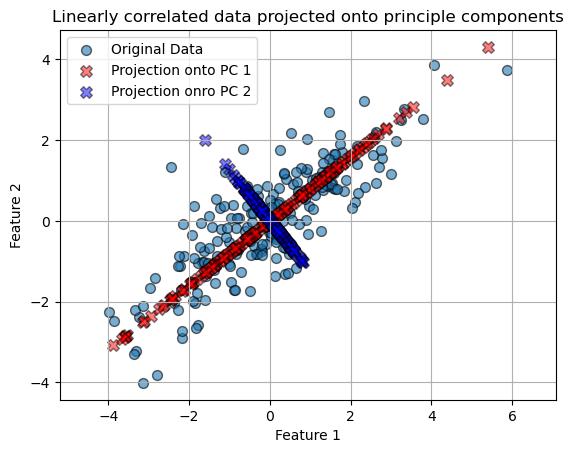

In [14]:
#plot the results
plt.figure()
plt.scatter(X[:,0], X[:,1], label = 'Original Data', ec = 'k', s= 50, alpha = 0.6)

#plot the projection along pc1 and pc2
plt.scatter(x_pc1, y_pc1, c='r', ec='k', marker = 'X', s= 70, alpha = 0.5, label = 'Projection onto PC 1')
plt.scatter(x_pc2, y_pc2, c='b', ec= 'k', marker= 'X', s= 70, alpha = 0.5, label = 'Projection onro PC 2')
plt.title('Linearly correlated data projected onto principle components', )
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.show()

It took some effort but now you can see what the the principal coordinates mean.

The data varies in two main directions. 
- The first direction, in red, is aligned in the direction having the widest variation.
- The second direction, in blue, is perpendicular to first and has a lower variance.

### Part II. PCA for feature space dimensionality reduction
For this second application, you'll use PCA to project the four-dimensional Iris feature data set down onto a two-dimensional feature space.

This will have the added benefit of enabling you to visualize some of the most important structures in the dataset.

In [15]:
# load the iris dataset
iris = datasets.load_iris()
X = iris.data
Y = iris.target
target_names = iris.target_names

#standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [16]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [18]:
# apply PCA nad reduce the dataset into 2 components
pca = PCA(n_components = 2)
X_pca = pca.fit_transform(X_scaled)

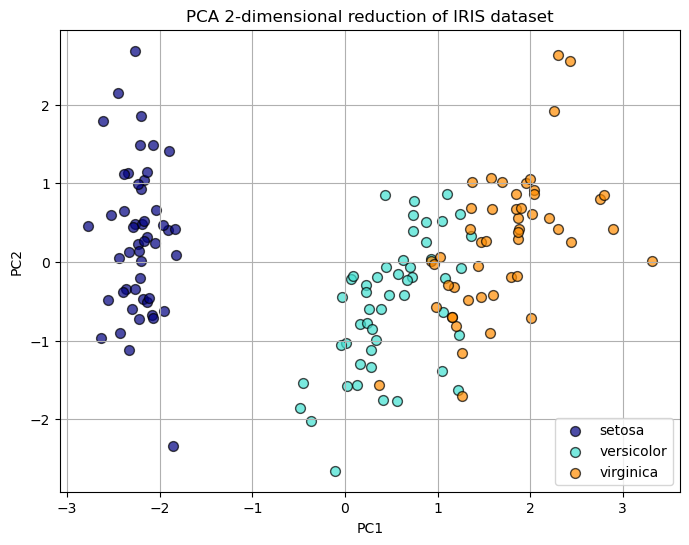

In [21]:
#plot the pca transformed data in 2d
plt.figure(figsize = (8,6))

colors = ['navy', 'turquoise', 'darkorange']
lw = 1

for color, i, target_name in zip(colors, [0,1,2], target_names):
    plt.scatter(X_pca[Y==i,0], X_pca[Y==i,1], color = color, s= 50, ec = 'k', alpha = 0.7, lw=lw, label = target_name)

plt.title('PCA 2-dimensional reduction of IRIS dataset',)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(loc = 'best', shadow = False, scatterpoints = 1,)
plt.grid(True)
plt.show()

In [22]:
100*pca.explained_variance_ratio_.sum()

95.81320720000164

In this next and final set of exercises, your goal is to:

Acquire and plot the PCA-explained variance ratios for all four Iris features as a barplot
Overlay the cummulative explained variance

Reinitialize the PCA model without reducing the dimension
Standardize the Iris data, and fit and transform the scaled data.

In [23]:
#standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#Apply pca
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

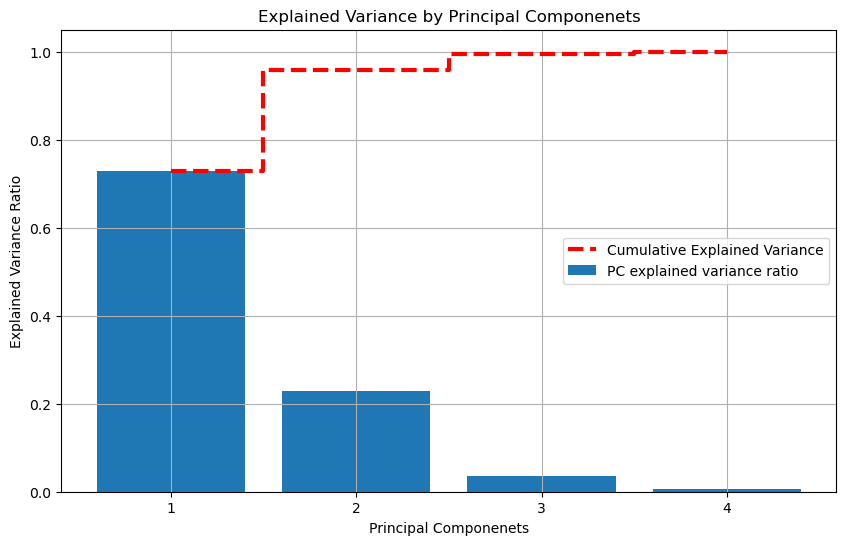

In [25]:
#explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

#plot explained variance ratio for each componenet

plt.figure(figsize=(10,6))
plt.bar(x=range(1, len(explained_variance_ratio)+1), height = explained_variance_ratio, alpha = 1, align = 'center', label = 'PC explained variance ratio')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Componenets')
plt.title('Explained Variance by Principal Componenets')

#plot cumulative explained variance
cummulative_variance = np.cumsum(explained_variance_ratio)
plt.step(range(1,5), cummulative_variance, where = 'mid', linestyle = '--', lw = 3, color = 'r', label = 'Cumulative Explained Variance')
#only display integer ticks on the x-axis
plt.xticks(range(1,5))
plt.legend()
plt.grid(True)
plt.show()

### **What does the red dashed line indicate?**  
The red dashed line represents the **cumulative explained variance** across the principal components. It shows how much of the total variance in the dataset is captured as we include more principal components.  

For example, if the cumulative explained variance reaches **95% at PC2**, it means that the first two principal components capture **95% of the total variance**, and additional components contribute minimally.


### **What would you consider doing if you wanted to suppress some noise in your data?**  
To reduce noise, you can:  

1. Choose fewer principal components: 
   - If the cumulative variance reaches **90-95%** with only the first few components, you can discard the remaining ones. This removes less significant (and potentially noisy) information.  

2. Use dimensionality reduction techniques like UMAP or t-SNE:  
   - **UMAP (Uniform Manifold Approximation and Projection)** captures the data's structure while preserving local and global patterns, making it useful for reducing noise in high-dimensional data.  

3. Apply feature selection techniques:
   - Use **variance thresholding**, **mutual information**, or **recursive feature elimination (RFE)** to remove irrelevant or redundant features before PCA.  

4. Perform data preprocessing:
   - Standardize data (`StandardScaler`) to ensure that PCA captures meaningful variance instead of scale differences.  
   - Use filtering techniques like **Gaussian smoothing** to remove high-frequency noise from raw data.  